# Лабораторна робота №3
# Тема: Злиття датафреймів, агрегування даних та візуалізація даних
# Мета: Вивчення функцій Pandas для злиття, агрегування та візуалізації даних.

<br>

<div style="background-color: white;">
Виконав: студент групи КН - 222c Максименко Валентин Михайлович 
</div>
<div style="background-color: white;">
Перевірив: асистент кафедри Герман Олександрович Зверцев
</div>

## Завдання

<br>

<div style="background-color: white;">
В цій лабораторній роботі потрібно використовувати методи Pandas для
злиття та агрегування, використовувати атрибути loc, iloc та слайсинг.
НЕ використовувати спискові включення та інші методи ітерування
всередині структур даних (для завдань 1-14)
</div>

1.Загрузити файл з даними про споживання енергії “En_In.xls”, який являє собою перелік показників енергозабезпечення та виробництва відновлюваної електроенергії, і ввести їх в DataFrame.

Майте на увазі, що це файл Excel, а не .csv. Також необхідно НЕ
ВКЛЮЧАТИ інформацію з нижніх та верхніх рядків файлу даних. Перші два
стовпці непотрібні, тому їх необхідно виключити із датафрейму, а також
поміняти мітки стовпців так, щоб вони були такими:
['Country', 'Energy Supply', 'Energy Supply per Capita', '%
Renewable]

In [62]:
import pandas as pd

energy_df = pd.read_excel('En_In.xls', skiprows=range(1,18), skipfooter=38, usecols="C:F")
energy_df.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

energy_df.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.67
1,Albania,102,35,100.00
2,Algeria,1959,51,0.55
3,American Samoa,...,...,0.64
4,Andorra,9,121,88.70


2.Переведіть дані із стовпчику ‘Energy Supply’ в гДж (Примітка: в 1ПДж = 1000000 ГДж). Для всіх країн, у яких відсутні дані (наприклад, дані з "....."), переконайтеся, що це відображається як значення np.NaN.

In [63]:
import numpy as np

energy_df['Energy Supply'] = energy_df['Energy Supply'].replace('...', np.NaN)
energy_df['Energy Supply'] = energy_df['Energy Supply'] * 1000000

energy_df.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321000000.00,10,78.67
1,Albania,102000000.00,35,100.00
2,Algeria,1959000000.00,51,0.55
3,American Samoa,NaN,...,0.64
4,Andorra,9000000.00,121,88.70


3.Перейменуйте наступний список країн: "Republic of Korea": "South Korea", "United States of America": "United States", "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "China, Hong Kong Special Administrative Region": "Hong Kong"

In [66]:
country_rename = {
    r"(.*United States of America.*)": "United States",
    r"(.*United Kingdom of Great Britain and Northern Ireland.*)": "United Kingdom",
    r"(.*China, Hong Kong Special Administrative Region.*)": "Hong Kong",
    r"(^(?!.*Democratic People's).*Republic of Korea.*)": "South Korea"
}

energy_df['Country'] = energy_df['Country'].replace(country_rename, regex=True)

energy_df

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321000000.00,10,78.67
1,Albania,102000000.00,35,100.00
2,Algeria,1959000000.00,51,0.55
3,American Samoa,NaN,...,0.64
4,Andorra,9000000.00,121,88.70
...,...,...,...,...
222,Viet Nam,2554000000.00,28,45.32
223,Wallis and Futuna Islands,0.00,26,0.00
224,Yemen,344000000.00,13,0.00
225,Zambia,400000000.00,26,99.71


4.Існує також декілька країн, що мають в назві цифри та/або дужки. Обов’язково видаліть їх, напр. 'Bolivia (Plurinational State of)' повинна бути ‘Bolivia’, ‘Switzerland17’ повинна бути Switzerland’.

In [67]:
import re

def clean_country_name(country):
    return re.sub(r' \(.+\)|\d+', '', country).strip()

energy_df['Country'] = energy_df['Country'].apply(clean_country_name)
energy_df

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321000000.00,10,78.67
1,Albania,102000000.00,35,100.00
2,Algeria,1959000000.00,51,0.55
3,American Samoa,NaN,...,0.64
4,Andorra,9000000.00,121,88.70
...,...,...,...,...
222,Viet Nam,2554000000.00,28,45.32
223,Wallis and Futuna Islands,0.00,26,0.00
224,Yemen,344000000.00,13,0.00
225,Zambia,400000000.00,26,99.71


In [68]:
energy_df.loc[energy_df['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,...,0.64
24,Bolivia,336000000.00,32,31.48
164,South Korea,11007000000.00,221,2.28


5.Далі, завантажте дані про ВВП з файлу „gpd.csv”, що містить дані Світового банку про ВВП країн від 1960 до 2015 року.
Обов’язково не включайте заголовок до датафрейму і перейменуйте наступний список країн:
"Korea, Rep.": "South Korea",
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"

In [69]:
gdp_df = pd.read_csv('gpd.csv', skiprows=4)

# Перейменування країн
gdp_rename = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}

gdp_df['Country Name'] = gdp_df['Country Name'].replace(gdp_rename)
gdp_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2467703910.61,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4018195653.51,4021331428.40,3675727910.51,3535389132.60,3346317328.52,3185604581.52,3129537611.89,3127549907.58,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,10305228125.14,11721187594.21,12144482858.18,14697331940.65,15936800636.25,16911126453.23,19352203805.63,19731337260.64,19990317160.68,20294152243.01
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,55811028114.65,68420444001.50,77874196512.18,79753199398.14,82470913120.73,85702615836.44,90120963241.22,96261432368.26,100886286610.96,103910558934.02
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9771760095.13,10348293941.59,11127520474.30,11500292411.17,11926953258.92,12231090567.67,12404772053.50,12542465022.37,12793314322.82,13120823169.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,"Yemen, Rep.",YEM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,26725653162.69,27617869836.71,28726558529.02,29914355173.58,30906753495.15,26243421035.82,26891601653.75,28009137429.75,NaN,NaN
260,South Africa,ZAF,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,77070810927.97,80034494636.64,84978442119.74,91244381889.66,98489040998.28,107250656239.05,...,340285160027.95,358526057738.42,369966781589.99,364276362720.09,375349442837.24,387407362601.25,396007124238.28,404768205399.94,411036853168.56,416311671520.86
261,"Congo, Dem. Rep.",COD,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,15080239239.40,13443825765.22,16294010600.12,17143578705.30,16725237057.94,16892046007.95,...,16508944144.72,17542316525.55,18634483660.30,19166509369.45,20523285374.19,21932132984.37,23502004276.81,25500497989.97,27787759925.44,29709613590.18
262,Zambia,ZMB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,4592974755.58,4655502678.70,4539541577.20,4688093222.99,5260699172.42,6136471743.34,...,14405693544.02,15608919909.95,16822341081.07,18373419545.14,20265552104.40,21403581063.30,23024380970.42,24205950559.40,25422273004.67,26241270767.76


6.Завантажте дані з файлу „scimagojr.xlsx”, який класифікує країни на основі їхніх публікацій в журналах у галузі енергетичного машинобудування та
енергетичних технологій.

In [27]:
scimago_df = pd.read_excel('scimagojr.xlsx')
scimago_df

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
...,...,...,...,...,...,...,...,...
186,187,Guyana,1,1,0,0,0.00,0
187,188,Christmas Island,1,1,0,0,0.00,0
188,189,Reunion,1,1,2,1,2.00,1
189,190,Saint Lucia,1,1,0,0,0.00,0


7.Приєднайте три набори даних із завдань 1-6 до нового набору даних (використовуючи перетин назв країн).
- Використовуйте лише дані про ВВП за останні 10 років (2006-2015 рр.) і лише 15 найкращих країн за рейтингом Scimagojr (Rank від 1 до 15)
- Індексом цього DataFrame повинна бути назва країни, а стовпцями мають бути ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '%
Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].
Ви повинні отримати DataFrame з 15 рядками та 20 стовпцями.

In [70]:
top15 = scimago_df.head(15)

gdp = gdp_df[['Country Name', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
gdp.set_index('Country Name', inplace=True)

energy = energy_df[['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']]
energy.set_index('Country', inplace=True)

merged = top15.merge(gdp, how='inner', left_on='Country', right_index=True).merge(energy, how='inner', left_on='Country', right_index=True)

merged.reset_index(inplace=True)

merged = merged[['Country', 'Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
                 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable',
                 '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

merged

,Country,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,China,1,127050,126767,597237,411683,4.70,138,127191000000.00,93,...,3992331462570.89,4559041383517.93,4997775145605.96,5459247267275.14,6039658508485.59,6612490294273.65,7124977970399.61,7672447738017.42,8230120617793.52,8797998940421.28
1,United States,2,96661,94747,792274,265436,8.20,230,90838000000.00,286,...,14792303791800.00,15055395304800.00,15011490541400.00,14594842181900.00,14964372000000.00,15204019634600.00,15542161722300.00,15773666098800.00,16156618476000.00,16548573278300.00
2,Japan,3,30504,30287,223024,61554,7.31,134,18984000000.00,149,...,5496541517363.31,5617035943770.73,5558526873313.82,5251308399909.32,5498717815809.77,5473738114222.05,5569101602926.18,5644658523313.42,5642884448582.19,5669563143140.97
3,United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000.00,124,...,2419630700401.73,2482203235475.90,2470614405284.30,2367047611711.99,2403504326328.80,2450911011124.85,2479808627472.19,2533370110012.36,2605643189894.93,2666333396477.13
4,Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000.00,214,...,1385792607182.58,1504071117741.30,1583004071092.11,1459199142720.26,1524917468442.01,1589942641764.29,1645875899596.27,1666934123163.16,1678708855070.86,1616148858033.77
5,Canada,6,17899,17620,215003,40930,12.01,149,10431000000.00,296,...,1564468853329.45,1596739898466.32,1612713061250.24,1565144676082.31,1613406134731.12,1664086754804.89,1693132927878.08,1730687770724.13,1773485821199.77,1792608764608.81
6,Germany,7,17027,16831,140566,27426,8.26,126,13261000000.00,165,...,3332890754966.89,3441560834437.09,3478809377483.44,3283339933774.83,3417298013245.03,3542371125827.81,3556723774834.44,3567317390728.48,3624386278145.70,3685555907284.77
7,India,8,15005,14841,128763,37209,8.58,115,33195000000.00,26,...,1265894322131.09,1374865195244.50,1428360609657.80,1549482541544.70,1708458876829.92,1821872415623.62,1924235460945.25,2051981849791.69,2200616575310.97,2367206118959.06
8,France,9,13153,12973,130632,28601,9.93,114,10597000000.00,166,...,2607839735099.34,2669423841059.60,2674637086092.71,2595966887417.22,2646994701986.75,2702031788079.47,2706968211920.53,2722566887417.22,2729631788079.47,2761185430463.58
9,South Korea,10,11983,11923,114675,22595,9.57,104,11007000000.00,221,...,941019882149.12,992431619676.20,1020509638539.71,1027729932849.17,1094499338702.72,1134795571930.64,1160809426196.79,1194429021591.57,1234340240503.49,1266580410309.11


8.Створіть функцію, щоб визначити середній ВВП країн за останні 10 років.

In [77]:
def average_gdp(dataframe):

    dataframe['Average GDP'] = dataframe[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']].mean(axis=1)
    sorted_avg_gdp = dataframe[['Country', 'Average GDP']].sort_values(by='Average GDP', ascending=False)
    return sorted_avg_gdp.set_index('Country')['Average GDP']

average_gdp(merged)

Country
United States        15364344302990.00
China                 6348608932836.10
Japan                 5542207638235.18
Germany               3493025339072.85
France                2681724635761.59
United Kingdom        2487906661418.42
Brazil                2189794143774.91
Italy                 2120175089933.78
India                 1769297396603.86
Canada                1660647466307.51
Russian Federation    1565459478480.66
Spain                 1418078278145.69
Australia             1164042729991.43
South Korea           1106714508244.85
Iran                   444155754051.09
Name: Average GDP, dtype: float64

9.Створіть функцію, щоб визначити, наскільки змінився ВВП за останні 10 років для країни з 5-м середнім ВВП.

In [81]:
def gdp_change_for_5th_country(dataframe):

    average_gdp_series = average_gdp_last_10_years(dataframe)

    fifth_country = average_gdp_series.index[4]

    gdp_2006 = dataframe.loc[fifth_country, '2006']
    gdp_2015 = dataframe.loc[fifth_country, '2015']

    gdp_change = gdp_2015 - gdp_2006

    return (fifth_country, gdp_change)

country, gdp_change = gdp_change_for_5th_country(merged_df)

print(f"Зміна ВВП для {country} за останні 10 років: {gdp_change}")

Зміна ВВП для Brazil за останні 10 років: 474343725980.5698


10.Створіть функцію, щоб визначити, в якій країні встановлено максимум поновлюваних джерел енергії (% Renewable) та який саме відсоток.

In [82]:
def max_renewable_energy_country(dataframe):

    country = dataframe['% Renewable'].idxmax()
    
    max_renewable_percent = dataframe.loc[country, '% Renewable']
    
    return (country, max_renewable_percent)

country, renewable_percent = max_renewable_energy_country(merged_df)

print({country}, {renewable_percent})

{'Brazil'} {69.64803}


11.Створіть стовпець, в якому оцінюється чисельність населення. Для пошуку оцінки використовуйте значення енергопостачання (Energy Supply) та енергопостачання на душу населення (Energy Supply per capita). Яка країна є шостою за цією оцінкою?

In [83]:
import pandas as pd

def sixth_largest_population(data):
    data['Population Estimate'] = data['Energy Supply'] / data['Energy Supply per Capita']

    sorted_data = data.sort_values('Population Estimate', ascending=False)

    sixth_country = sorted_data.iloc[5] 

    result = (sixth_country['Country'], sixth_country['Population Estimate'])
    return result

result_tuple = sixth_largest_population(merged)
result_tuple

('Japan', 127409395.97315437)

12.Створіть стовпець, в якому оцінюється кількість цитованих документів на одну особу. Який взаємозв'язок між кількістю цитованих документів на душу населення та енергозабезпеченням на душу населення? Використовуйте метод .corr () (кореляція Пірсона).

In [84]:
def calculate_citations_per_capita(dataframe):
    
    dataframe['Citations per Capita'] = dataframe['Citations'] / (dataframe['Energy Supply'] / dataframe['Energy Supply per Capita'])

    correlation = dataframe[['Citations per Capita', 'Energy Supply per Capita']].corr().iloc[0, 1]

    return correlation

correlation = calculate_citations_per_capita(merged_df)

print(correlation)

0.7443592662858144


13.Створіть новий стовпчик в який занесіть 1, якщо значення % відновлюваної енергії (% Renewable) країни дорівнює або вище медіани для всіх країн, і 0, якщо значення (% Renewable) нижче медіани.

In [95]:
def add_renewable_indicator(dataframe):
    
    median_renewable = dataframe['% Renewable'].median()
    
    dataframe['Renewable Indicator'] = dataframe['% Renewable'].apply(lambda x: 1 if x >= median_renewable else 0)
    
    renewable_series = dataframe.set_index('Country')['Renewable Indicator']
    
    return renewable_series

renewable_indicator = add_renewable_indicator(merged)

print(renewable_indicator)

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Renewable Indicator, dtype: int64


14.Використайте наступний словник, щоб згрупувати країни за континентами, потім створіть DataFrame, який відображає розмір вибірки (кількість країн на кожному континенті), а також суму, середнє та стандартне відхилення для оцінки кількості населення для кожної країни.

In [96]:
import pandas as pd
import numpy as np

ContinentDict = {'China':'Asia',
                 'United States':'North America',
                 'Japan':'Asia',
                 'United Kingdom':'Europe',
                 'Russian Federation':'Europe',
                 'Canada':'North America',
                 'Germany':'Europe',
                 'India':'Asia',
                 'France':'Europe',
                 'South Korea':'Asia',
                 'Italy':'Europe',
                 'Spain':'Europe',
                 'Iran':'Asia',
                 'Australia':'Australia',
                 'Brazil':'South America'}

data = {'Country': list(ContinentDict.keys()), 'Continent': list(ContinentDict.values())}
df = pd.DataFrame(data)

df['Population'] = np.random.randint(1000000, 1000000000, len(df))

continent_stats = df.groupby('Continent')['Population'].agg(['size', 'sum', 'mean', 'std'])

continent_stats.index.name = 'Continent'
continent_stats.columns = ['size', 'sum', 'mean', 'std']
continent_stats

,size,sum,mean,std
Continent,,,,
Asia,5,2727750648,545550129.60,309756294.59
Australia,1,657055253,657055253.00,NaN
Europe,6,3277569951,546261658.50,233724616.40
North America,2,665254708,332627354.00,14982847.40
South America,1,829311410,829311410.00,NaN


15.Створіть бульбашкову діаграму, що відображає залежність % поновлюваних джерел від рейтингу країни (% Renewable vs. Rank). Розмір бульбашки від повідає ВВП країн 2015 року, а колір відповідає континенту.

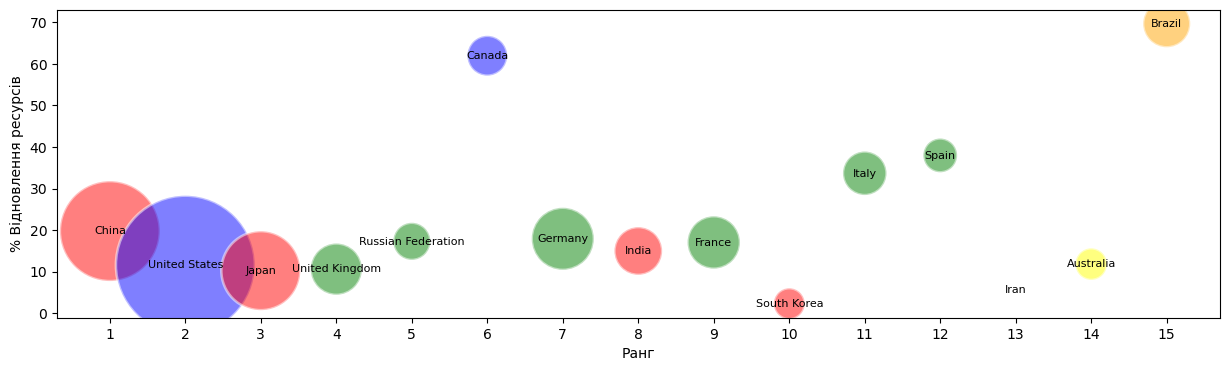

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 4))  

country_colors = {
    'China': 'red', 
    'Japan': 'red',  
    'India': 'red', 
    'South Korea': 'red',  
    'Iran': 'red',  
    'United States': 'blue', 
    'Canada': 'blue',  
    'United Kingdom': 'green', 
    'Russian Federation': 'green',  
    'Germany': 'green', 
    'France': 'green', 
    'Italy': 'green', 
    'Spain': 'green',  
    'Brazil': 'orange',  
    'Australia': 'yellow' 
}

bubble = sns.scatterplot(x='Rank', y='% Renewable', size='2015', data=merged, sizes=(500, 10000), legend=False, hue=merged['Country'], palette=country_colors, alpha=0.5)
plt.legend([], [], frameon=False)  

plt.xlabel('Ранг')  
plt.ylabel('% Відновлення ресурсів') 
plt.xticks(range(1, 16, 1))
plt.yticks(fontsize=10) 

for i in range(len(merged)):
    plt.text(merged['Rank'][i], merged['% Renewable'][i], merged['Country'][i], ha='center', va='center', fontsize=8)

# Відображення бульбашкової діаграми
plt.show()

**Висновок до Лабораторної Роботи №3**

В цілому, лабораторна робота дала нам можливість практично використати основні функції Pandas для роботи з даними, від злиття та об'єднання до агрегації та візуалізації. Ці навички є важливими для подальшого аналізу та роботи з даними в галузі аналізу даних та машинного навчання.